# Understand stars in Gaia data (instructor version)

**Prerequisites**
- $\texttt{numpy}$, $\texttt{matplotlib}$, and Basic Stats.

**New $\texttt{python}$ skills**
- $\texttt{pandas}$: a package for loading and manipulating tables of data (you can think of this as $\texttt{python}$'s version of Excel or google sheets).

**Astro concepts**

* The Gaia mission
* Magnitude and absolute magnitude scales
* Basic properties of stars: radius, temperature, color, etc.

In [12]:
# Let's start with importing our packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# We can beautify our plots by changing the matplotlib settings a little
plt.rcParams['font.size'] = 18
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['font.family'] = "serif"

# 1. Reading a table with $\texttt{pandas}$

In [13]:
# Let's load in the data
import os
from google.colab import drive
from astropy.table import Table

drive.mount('/content/drive/')
os.chdir('/content/drive/Shareddrives/AST207/data')

gaia = pd.read_csv('./gaia_15pc.csv',index_col=[0])

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### What's in the table and how can we access it?

In [14]:
# Let's print the first couple rows of data
gaia.head()

,radius,teff,distance,gmag,rmag,bmag,ecl_lon,ecl_lat
0,0.5023,3224.9536,13.3978,10.241307,9.135763,11.498909,279.484182,8.627836
1,0.4488,3508.4785,13.5867,10.019066,8.943984,11.186045,63.836273,38.387682
2,0.4814,3310.7295,13.5787,10.193903,9.102655,11.395733,63.836924,38.388986
3,0.6412,3473.9587,7.0383,7.756715,6.747296,8.790974,7.104283,71.152618
4,0.4892,3155.9285,8.5053,9.495382,8.347611,10.836117,249.618870,-15.836896


In [15]:
# We can also print the last couple rows of data
gaia.tail()

,radius,teff,distance,gmag,rmag,bmag,ecl_lon,ecl_lat
501,0.1677,2878.0027,12.7056,13.652472,12.276646,15.956352,212.820918,21.919965
502,0.1887,2959.8933,12.2233,13.079426,11.746457,15.165963,271.133288,60.948970
503,0.8268,4914.2610,11.0935,6.129808,5.502101,6.585531,273.994073,61.861649
504,0.6636,3889.6328,3.4947,5.450645,4.556912,6.272253,336.994179,51.894370
505,0.6760,4353.7437,3.4904,4.766713,3.977203,5.439793,336.994324,51.903146


In [16]:
# What columns are in the table?
gaia.columns

Index(['radius', 'teff', 'distance', 'gmag', 'rmag', 'bmag', 'ecl_lon',
       'ecl_lat'],
      dtype='object')

In [17]:
# Let's access a single column
gaia['teff']

,teff
0,3224.9536
1,3508.4785
2,3310.7295
3,3473.9587
4,3155.9285
...,...
501,2878.0027
502,2959.8933
503,4914.2610
504,3889.6328


# 2. Getting started with data

**Exercise:** Using $\texttt{numpy}$ calculate the mean, median, and standard deviation of the `distance` column.

In [18]:
data = gaia['distance']
print(f'Mean={np.mean(data):.3}')
print(f'Median={np.median(data):.3}')
print(f'Stdev={np.std(data):.3}')

Mean=11.3
Median=11.9
Stdev=3.01


**Exercise:** It's hard to how what these numbers mean without visualizing the data. Let's make a histogram of the distances. Be sure to include labels on the x and y axis. Include the mean and median as vertical lines.

Text(0.5, 0, 'Distance [pc]')

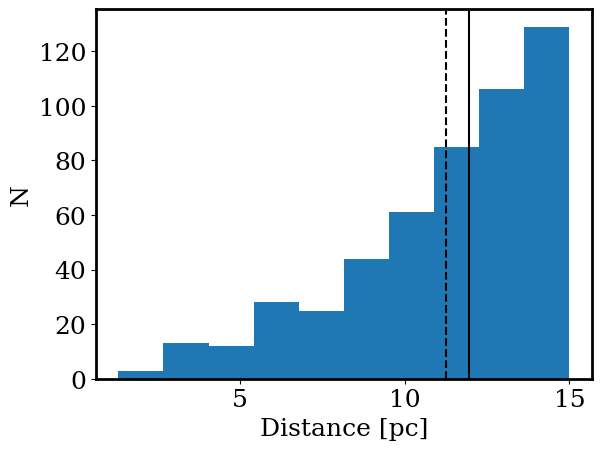

In [19]:
plt.hist(gaia['distance'])
plt.axvline(np.median(data),color='k')
plt.axvline(np.mean(data),color='k',linestyle='--')
plt.ylabel('N')
plt.xlabel('Distance [pc]')

**Exercise:** What can we learn about the distances of near by stars based on the histogram? For instance, is the histogram skewed towards very high or very low values? or is the histogram symmetric? What does this tell us about stars near the Sun?

**Example answer:** the histogram of distances in the table is strongly skewed towards high values. In fact the histogram peaks at the largest distance bin. More advanced students could spend time here and compare the histogram to what we expect from uniformly distributed stars.

**Exercise:** In astronomy, we often ask how different properties of stars depend on each other. For example, does the size of a star depend on it's temperature? First let's make scatter plots of temperature vs. radius, distance vs. radius, and distance vs. temperature.

Bonus: try using for loops to reduce duplicated code

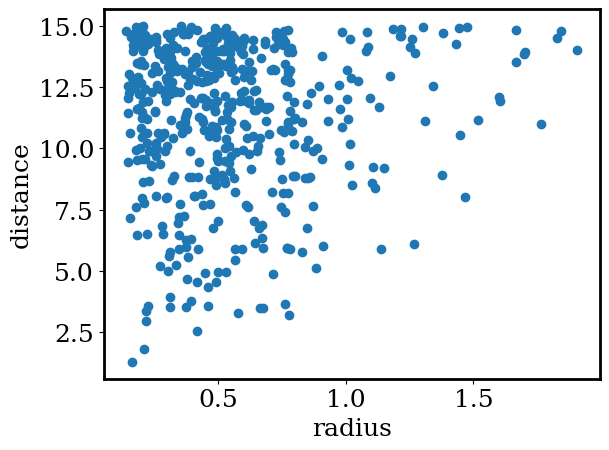

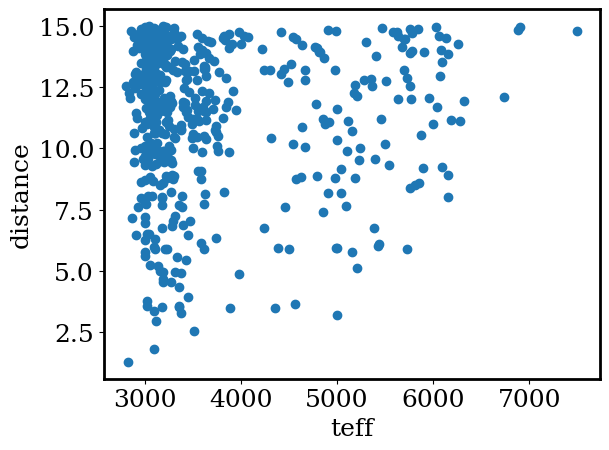

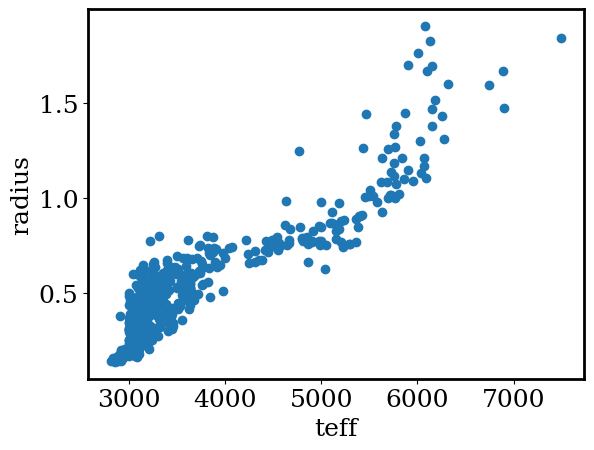

In [20]:
columns = ['distance', 'radius', 'teff']
for i in range(len(columns)):
    for j in range(len(columns)):
        if i > j:
            plt.scatter(gaia[columns[i]],gaia[columns[j]])
            plt.xlabel(columns[i])
            plt.ylabel(columns[j])
            plt.show()

**Exercise:** Write a single sentence summary of each plot. Based on your scatter plots, which properties are most strongly correlated?

# 3. Practicing with magnitudes

As we discussed in lecture, magnitudes appear everywhere in astronomy. Let's practice using magnitudes with our Gaia stars. Remember, the definition of magnitude is:
$$ m_1 - m_2 = - 2.5 \log_{10} (F_1 / F_2) $$
where $m_1, m_2$ are the magnitudes of two stars (creatively named 1 and 2) and $F_1, F_2$ are the fluxes of those two stars.

**Exercise:** To get some practice, let's convert the magnitudes listed in the table to fluxes. Let's calculate our fluxes relative to the Sun:
$$ m_1 + 26.83 = - 2.5 \log_{10} (F_1 / F_\mathrm{Sun}) $$
we've set $m_2 = −26.83$ and $F_2 = F_\mathrm{Sun}$, where $F_\mathrm{Sun}$ is the flux (aka. brightness) of the Sun as measured from Earth.

Make a histogram of $\log_{10}(F_1 / F_\mathrm{Sun})$ for the $g$, $r$, and $b$ Gaia filters (the Gaia magnitudes are stored under the $\texttt{gmag, rmag, bmag}$ columns).

Bonus: write a function for the flux to magnitude conversion

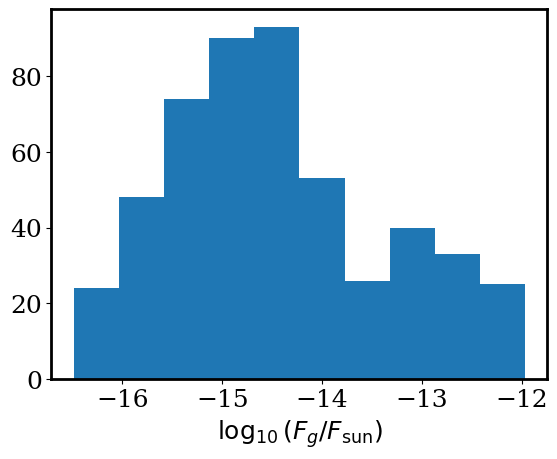

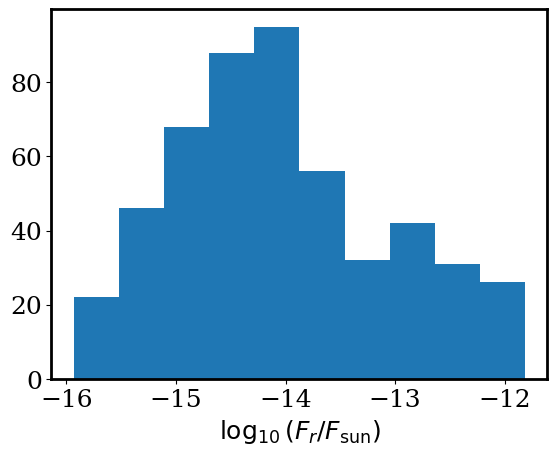

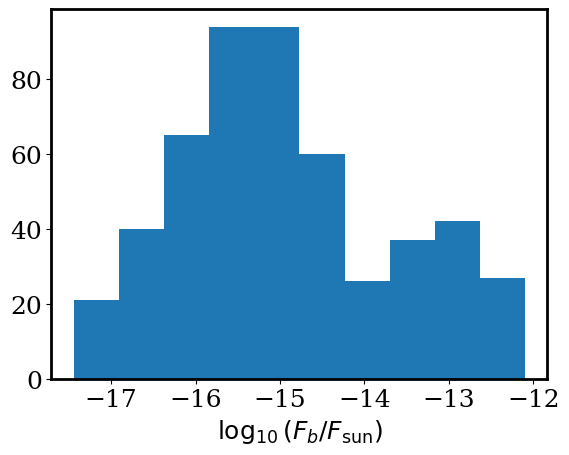

In [21]:
def magnitude_to_flux(magnitude):
    return 10**( (magnitude + 26.83) / -2.5 )

for band in 'grb':
    magnitude = gaia[band+'mag']
    flux_relative_to_sun = magnitude_to_flux(magnitude)

    plt.hist(np.log10(flux_relative_to_sun))
    plt.xlabel('$\log_{10}'+f'(F_{band}'+'/F_\mathrm{sun})$')
    plt.show()

**Exercise:** Based on your histograms how much brighter does the Sun appear to us than the brightest nearby star (in gaia g-band)?

**Example answer:** We made a histogram of $\log_{10}(F_1/F_\mathrm{sun})$. So the brightest star will be the maximum value in our histogram. That means the Sun appears 1000000000000 brighter than the next brightest star in the sky!

So far, we have considered how bright stars appear in the sky. However, we know this depends on the stars' distances from the Earth. Remember the apparent brightness of a star (aka flux $F$) is related to its luminosity $L$ (the amount of energy output by the star each second) and distance $d$ by:
$$  F = \frac{L}{4 \pi d^2} $$

**Exercise:** Use the above equation to write an equation for $L$. Then write an equation for $L / L_\mathrm{sun}$. Using your equation, make a histogram of $\log_{10} (L / L_\mathrm{Sun})$ (based on the $g$-band magnitude).

Text(0.5, 0, '$\\log_{10}(L/L_\\mathrm{sun})$')

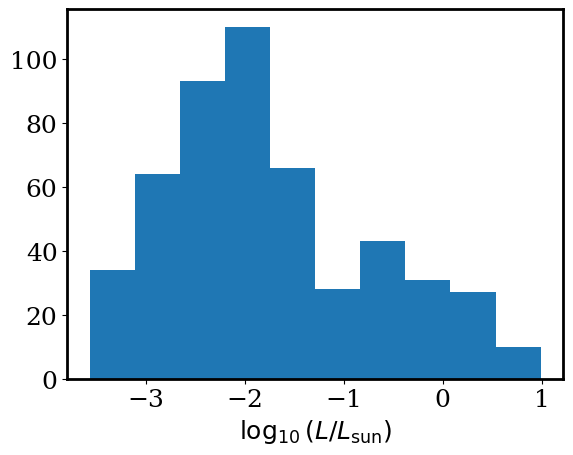

In [22]:
distances = gaia['distance'] # pc
flux_relative_to_sun = magnitude_to_flux(gaia['gmag'])
L_relative_to_sun    = flux_relative_to_sun  *(gaia['distance'] / 4.848e-6)**2

plt.hist(np.log10(L_relative_to_sun))
plt.xlabel('$\log_{10}(L/L_\mathrm{sun})$')

**Exercise:** What can we learn from this histogram? Is the Sun typical compared to nearby stars?